# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


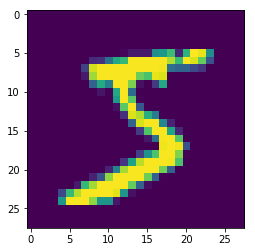

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**MODEL-1**

**Forth Model from last assignment**

This model is taken from the last assignment and gave best validation accuracy. The accuracy changes in every run however, it has been more than 99.40% always.

In [10]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)       

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 35s 576us/step - loss: 0.2163 - acc: 0.9443 - val_loss: 0.0612 - val_acc: 0.9827
Epoch 2/30
60000/60000 [==============================] - 32s 541us/step - loss: 0.1004 - acc: 0.9718 - val_loss: 0.0551 - val_acc: 0.9833
Epoch 3/30
60000/60000 [==============================] - 34s 559us/step - loss: 0.0807 - acc: 0.9763 - val_loss: 0.0412 - val_acc: 0.9870
Epoch 4/30
60000/60000 [==============================] - 33s 543us/step - loss: 0.0680 - acc: 0.9797 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 5/30
60000/60000 [==============================] - 33s 551us/step - loss: 0.0628 - acc: 0.9811 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 6/30
60000/60000 [==============================] - 33s 555us/step - loss: 0.0575 - acc: 0.9830 - val_loss: 0.0236 - val_acc: 0.9932
Epoch 7/30
60000/60000 [==============================] - 35s 578us/step - loss: 0.0535 - acc: 0.9837 - val_loss: 0.

Following code shows the first 25 wrongly predicted images with their predicted class and actual class values.

Found incorrect labels: 63


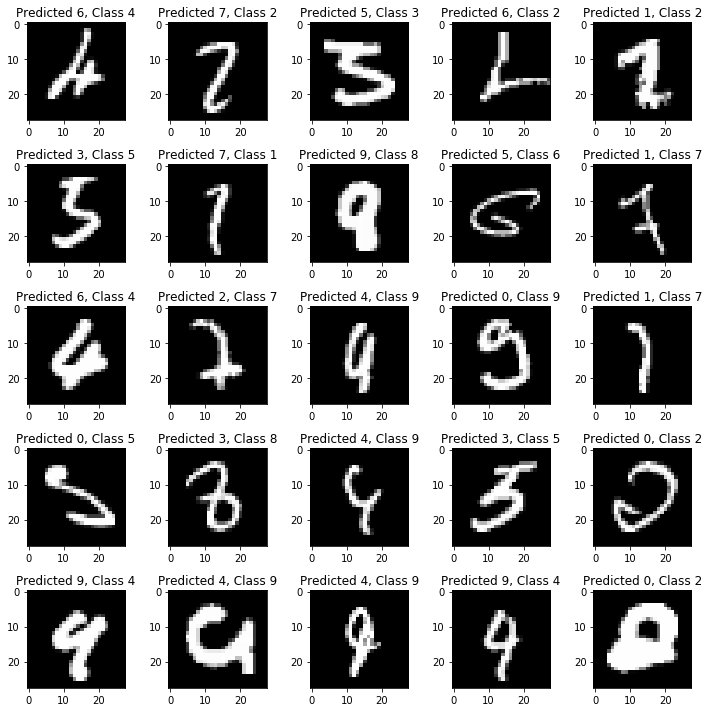

In [12]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape
incorrect =np.where(predicted_classes != y_test)[0]
print ('Found incorrect labels:', len(incorrect))
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect[:25]):
   plt.subplot(5,5,i+1)
   plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
   plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
   plt.tight_layout()

With the modified model, highest accuracy achieved is approx **99.50%** on the validation dataset. 

**MODEL-2**

New model after moving batch normalization before Relu activation function as suggested by different acadmecian as well as Dr. Andrew Ng.

In [13]:
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 16)       

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
mcp = ModelCheckpoint("Model2", monitor="val_acc",
                      save_best_only=True, save_weights_only=False)
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[mcp])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 33s 553us/step - loss: 0.2325 - acc: 0.9397 - val_loss: 0.0722 - val_acc: 0.9805
Epoch 2/30
60000/60000 [==============================] - 34s 567us/step - loss: 0.1100 - acc: 0.9697 - val_loss: 0.0536 - val_acc: 0.9829
Epoch 3/30
60000/60000 [==============================] - 33s 545us/step - loss: 0.0858 - acc: 0.9745 - val_loss: 0.0399 - val_acc: 0.9881
Epoch 4/30
60000/60000 [==============================] - 32s 538us/step - loss: 0.0756 - acc: 0.9778 - val_loss: 0.0573 - val_acc: 0.9819
Epoch 5/30
60000/60000 [==============================] - 33s 549us/step - loss: 0.0676 - acc: 0.9801 - val_loss: 0.0340 - val_acc: 0.9889
Epoch 6/30
60000/60000 [==============================] - 34s 560us/step - loss: 0.0596 - acc: 0.9822 - val_loss: 0.0284 - val_acc: 0.9915
Epoch 7/30
60000/60000 [==============================] - 34s 561us/step - loss: 0.0598 - acc: 0.9823 - val_loss: 0.

Found incorrect labels: 59


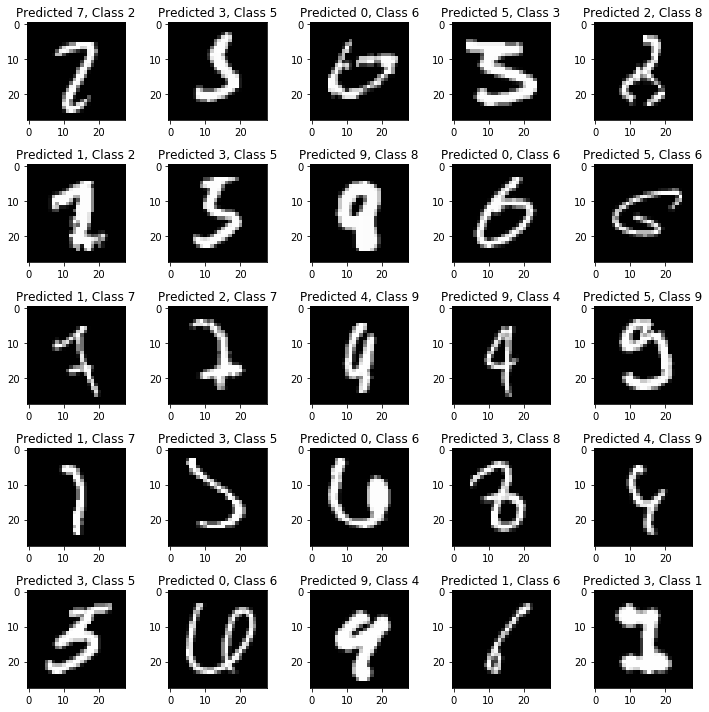

In [15]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape
incorrect =np.where(predicted_classes != y_test)[0]
print ('Found incorrect labels:', len(incorrect))
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect[:25]):
   plt.subplot(5,5,i+1)
   plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
   plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
   plt.tight_layout()

Validation accuracy in the Model-2 does not change much.

**MODEL-3**

**Model with Regularization** - Regularization is used within the layers in this model.

Tried different regularization values and finally best results come with regularization value of 0.005. Though this has little negative impact on the accuracy and overall Learning.

In [16]:
from keras import regularizers

model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.005))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.005)))
model.add(Convolution2D(10, 8, kernel_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 16)       

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay=0.0001),
             metrics=['accuracy'])
mcp = ModelCheckpoint("Model3", monitor="val_acc",
                      save_best_only=True, save_weights_only=False)
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[mcp])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 37s 616us/step - loss: 0.4883 - acc: 0.9232 - val_loss: 0.4930 - val_acc: 0.9083
Epoch 2/30
60000/60000 [==============================] - 33s 557us/step - loss: 0.3669 - acc: 0.9393 - val_loss: 0.3018 - val_acc: 0.9586
Epoch 3/30
60000/60000 [==============================] - 34s 570us/step - loss: 0.3281 - acc: 0.9459 - val_loss: 0.2966 - val_acc: 0.9575
Epoch 4/30
60000/60000 [==============================] - 35s 577us/step - loss: 0.2938 - acc: 0.9499 - val_loss: 0.4177 - val_acc: 0.9049
Epoch 5/30
60000/60000 [==============================] - 34s 560us/step - loss: 0.2761 - acc: 0.9529 - val_loss: 0.4266 - val_acc: 0.8980
Epoch 6/30
60000/60000 [==============================] - 35s 579us/step - loss: 0.2646 - acc: 0.9550 - val_loss: 0.2404 - val_acc: 0.9613
Epoch 7/30
60000/60000 [==============================] - 34s 565us/step - loss: 0.2465 - acc: 0.9581 - val_loss: 0.

Found incorrect labels: 246


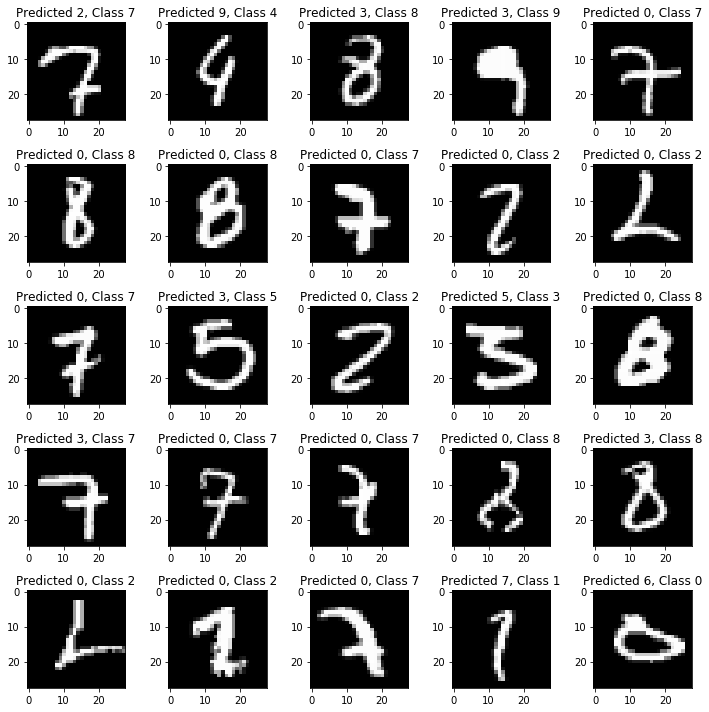

In [18]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape
incorrect =np.where(predicted_classes != y_test)[0]
print ('Found incorrect labels:', len(incorrect))
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect[:25]):
   plt.subplot(5,5,i+1)
   plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
   plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
   plt.tight_layout()

Layer with regularization has negative impact on the model and hence not used in further models

**MODEL-4**

**Model with Regularization** - Regularization is used in the loss function and a custom loss function is defined for that.

In [0]:
from keras import backend as K
batch_size = 32

def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.01 #1e-4

    for layer in model.layers:
      sqr_w = sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(batch_size)
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss

In [20]:
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)       

In [21]:
model.compile(loss=custom_loss,
             optimizer=optimizers.Adam(lr = 0.01, decay=0.0001),
             metrics=['accuracy'])
mcp = ModelCheckpoint("Model4", monitor="val_acc",
                      save_best_only=True, save_weights_only=False)
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[mcp])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 37s 623us/step - loss: 35.4762 - acc: 0.9566 - val_loss: 35.3403 - val_acc: 0.9862
Epoch 2/30
60000/60000 [==============================] - 34s 563us/step - loss: 35.3685 - acc: 0.9790 - val_loss: 35.3252 - val_acc: 0.9915
Epoch 3/30
60000/60000 [==============================] - 32s 539us/step - loss: 35.3506 - acc: 0.9836 - val_loss: 35.3245 - val_acc: 0.9911
Epoch 4/30
60000/60000 [==============================] - 33s 547us/step - loss: 35.3430 - acc: 0.9859 - val_loss: 35.3272 - val_acc: 0.9899
Epoch 5/30
60000/60000 [==============================] - 34s 568us/step - loss: 35.3348 - acc: 0.9877 - val_loss: 35.3226 - val_acc: 0.9907
Epoch 6/30
60000/60000 [==============================] - 32s 531us/step - loss: 35.3309 - acc: 0.9890 - val_loss: 35.3198 - val_acc: 0.9923
Epoch 7/30
60000/60000 [==============================] - 34s 560us/step - loss: 35.3278 - acc: 0.9902 -

Found incorrect labels: 68


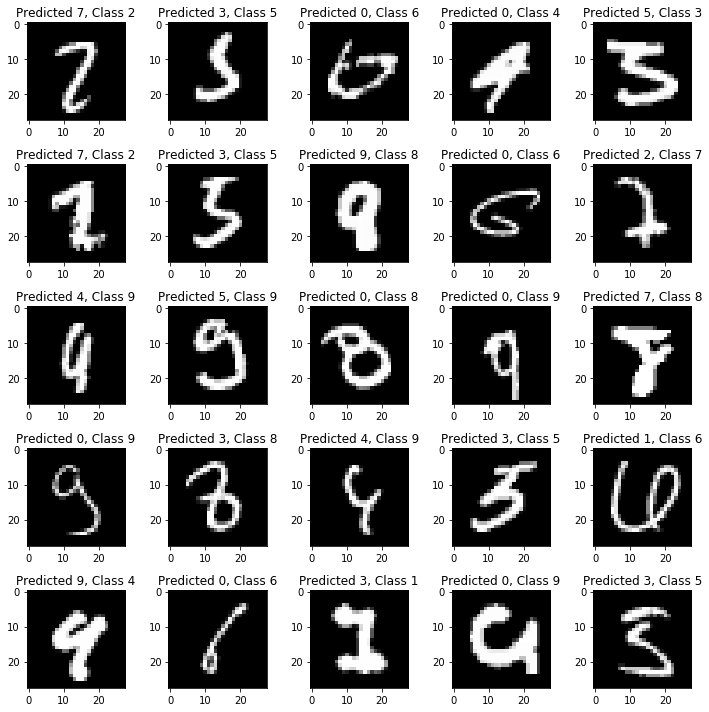

In [22]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape
incorrect =np.where(predicted_classes != y_test)[0]
print ('Found incorrect labels:', len(incorrect))
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect[:25]):
   plt.subplot(5,5,i+1)
   plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
   plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
   plt.tight_layout()

**MODEL-5**

**Image Normalization**

In this model regularization of any type has been removed because it was having either negative impact or no impact.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)


In [24]:
from keras import regularizers

model = Sequential()

model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3, 3))) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, (3, 3))) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3, 3))) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(10, (1, 1)))
model.add(Convolution2D(10, (8, 8)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 16)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

training_set= train_gen.flow(X_train, y_train, batch_size=32)
test_set= train_gen.flow(X_test, y_test, batch_size=32)

In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay=0.0001),
             metrics=['accuracy'])
              
mcp = ModelCheckpoint("Model5", monitor="val_acc",
                      save_best_only=True, save_weights_only=False)

model.fit_generator(training_set, 
                         steps_per_epoch=60000//32, 
                         validation_data= test_set, 
                         validation_steps=10000//32, 
                         epochs=30,
                         callbacks=[mcp])

Epoch 1/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2712 - acc: 0.9261 - val_loss: 0.0991 - val_acc: 0.9718
Epoch 2/30
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1254 - acc: 0.9636 - val_loss: 0.0573 - val_acc: 0.9828
Epoch 3/30
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0987 - acc: 0.9708 - val_loss: 0.0622 - val_acc: 0.9812
Epoch 4/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0828 - acc: 0.9758 - val_loss: 0.0405 - val_acc: 0.9876
Epoch 5/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0763 - acc: 0.9777 - val_loss: 0.0402 - val_acc: 0.9868
Epoch 6/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0670 - acc: 0.9803 - val_loss: 0.0396 - val_acc: 0.9876
Epoch 7/30
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0649 - acc: 0.9813 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 8/30
1875/1875 [==========================

**Summary**

***Model 1*** has given the best performance so far. 